# Assignment1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
os.getcwd()

'/home/leonardo/Documents/CSCI191T'

In [2]:
os.chdir("/home/leonardo/Documents/CSCI191T/csv/assignment1")
# Load DataSets
vehicle_delay = pd.read_csv("caltrans_annual_vehicle_hours_of_delay_at_35_miles_per_hour___vehicle_miles_traveled_2017.csv")
water_quality = pd.read_csv("stations.csv")
drinking_water = pd.read_csv("uw_supplier_data010720.csv")
fuel_type = pd.read_csv("vehicle-fuel-type-count-by-zip-code.csv")

economic_growth = pd.read_csv("economic_growth_over_the_past_10_years.csv")
pop_density = ("population_density_per_square_km.csv")

/home/leonardo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Vehicle Delay DataSet

In [3]:
vehicle_delay.head()


,Route Number,Route Suffix,County,Vehicle Hours of Delay (VHD) Rank,Annual Vehicle Hours of Delay (VHD) at 35 miles per hour (mph),Annual Vehicle Miles Traveled (VMT),Number of Incidents,Incidents/ Day,Incidents/ million VMT
0,99,NaN,BUT,1,7372,59973595,834,2.28,13.91
1,50,NaN,ED,2,34070,614933130,1741,4.77,2.83
2,80,NaN,NEV,3,36132,522576590,1781,4.88,3.41
3,65,NaN,PLA,4,149952,311279662,1029,2.82,3.31
4,80,NaN,PLA,5,210066,1430481526,4727,12.95,3.30


In [4]:
vehicle_delay = vehicle_delay.drop(["Route Suffix", "County","Vehicle Hours of Delay (VHD) Rank"], axis=1)
vehicle_delay = vehicle_delay.sort_values(by=["Route Number"])

In [5]:
vehicle_delay = vehicle_delay.fillna(0)
vehicle_delay.iloc[:,1] = [i if '-' not in i else 0 for i in vehicle_delay.iloc[:,1]]
vehicle_delay.iloc[:,3] = [i if '-' not in i else 0 for i in vehicle_delay.iloc[:,3]]

In [6]:
vehicle_delay.head()

,Route Number,Annual Vehicle Hours of Delay (VHD) at 35 miles per hour (mph),Annual Vehicle Miles Traveled (VMT),Number of Incidents,Incidents/ Day,Incidents/ million VMT
74,1,732800,639600069,1569,4.30,2.45
69,1,220016,461705156,1296,3.55,2.81
55,1,7265,65635150,11,0.03,0.17
165,1,51,94972354,0,0.00,0.00
94,2,410015,488397479,16,0.04,0.03


In [7]:
routes = vehicle_delay["Route Number"].unique()
total_delay = pd.DataFrame(data={'Route':[],'Annual VHD 35mph':[],'Annual VMT':[],'Num Incidents':[], 'Incidents/Day':[], 'Incidents/Million VMT':[]})
for r in routes:
    aVHD35 = vehicle_delay[vehicle_delay['Route Number'] == r].iloc[:,1].astype(int).sum()
    aVMT = vehicle_delay[vehicle_delay['Route Number'] == r].iloc[:,2].astype(int).sum()
    numIncidents = vehicle_delay[vehicle_delay['Route Number'] == r].iloc[:,3].astype(int).sum()
    incidentsPerDay = vehicle_delay[vehicle_delay['Route Number'] == r].iloc[:,4].astype(int).sum()
    incidentsVMT = vehicle_delay[vehicle_delay['Route Number'] == r].iloc[:,5].astype(int).sum()

    temp = pd.DataFrame([[r,aVHD35,aVMT,numIncidents,incidentsPerDay,incidentsVMT]], columns=['Route','Annual VHD 35mph','Annual VMT','Num Incidents', 'Incidents/Day', 'Incidents/Million VMT'])
    total_delay = total_delay.append(temp)
total_delay.head()

,Route,Annual VHD 35mph,Annual VMT,Num Incidents,Incidents/Day,Incidents/Million VMT
0,1.0,960132.0,1.261913e+09,2876.0,7.0,4.0
0,2.0,410015.0,4.883975e+08,16.0,0.0,0.0
0,4.0,1184088.0,1.597401e+09,5094.0,13.0,5.0
0,5.0,14836434.0,1.714928e+10,60742.0,162.0,30.0
0,8.0,744040.0,1.337021e+09,6414.0,17.0,4.0


Text(0.5, 1.0, 'Incidents per Route')

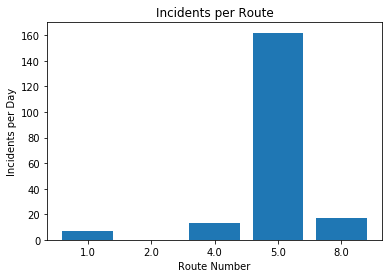

In [8]:
obj = total_delay["Route"][:5]
y_pos = np.arange(len(obj))
plt.bar(y_pos,total_delay["Incidents/Day"][:5])
plt.xticks(y_pos, obj)
plt.ylabel("Incidents per Day")
plt.xlabel("Route Number")
plt.title('Incidents per Route')

### Economic Growth DataSet

In [9]:
economic_growth.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.680,-9.740,-7.830,-6.700,-7.4400,-12.200,-13.800,-9.630,-6.380,-5.4900
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.273,6.710,11.200,8.320,6.7200
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.246,-0.408,-0.835,-0.117,0.0587,0.324,0.336,0.188,0.988,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.830,4.670,5.130,3.490,3.4800,2.680,2.950,3.200,2.800,NaN
4,Argentina,1.03,0.988,1.69,1.11,1.46,1.68,1.54,1.41,1.25,...,1.650,1.360,1.890,2.600,3.1900,3.250,1.630,-0.501,-0.350,-0.0209


In [10]:
economic_growth = economic_growth.transpose().reset_index()

economic_growth.columns = economic_growth.iloc[0]
economic_growth = economic_growth.drop([0])

In [12]:
economic_growth = economic_growth.fillna(method="ffill", axis=0)
economic_growth = economic_growth.fillna(0)

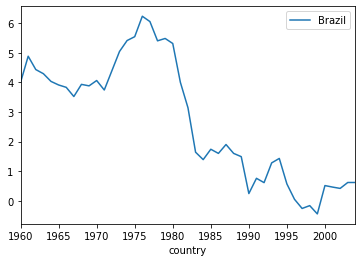

In [13]:
economic_growth.plot(x="country", y="Brazil")

### Fuel Type DataSet

In [14]:
fuel_type = fuel_type.drop(['Date', 'Make'], axis=1)

In [15]:
fuel_type.head()

,Zip Code,Model Year,Fuel,Duty,Vehicles
0,90000,2006,Gasoline,Light,1
1,90000,2014,Gasoline,Light,1
2,90000,2016,Gasoline,Light,1
3,90000,2017,Gasoline,Light,1
4,90000,<2006,Diesel and Diesel Hybrid,Heavy,55


In [16]:
fuel_type['Zip Code'].unique()

array([90000, 90001, 90002, ..., '99999', 'OOS', 'Other'], dtype=object)

In [35]:
total_cars = fuel_type["Vehicles"].groupby(fuel_type["Fuel"]).sum()

In [41]:
total_cars = pd.DataFrame({"Fuel Type": total_cars.index, "Total Cars": total_cars.values})

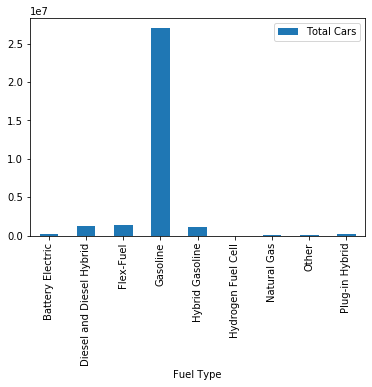

In [42]:
total_cars.plot.bar(x="Fuel Type", y="Total Cars")